In [11]:
# Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

plt.rcParams["figure.figsize"] = (12, 9)

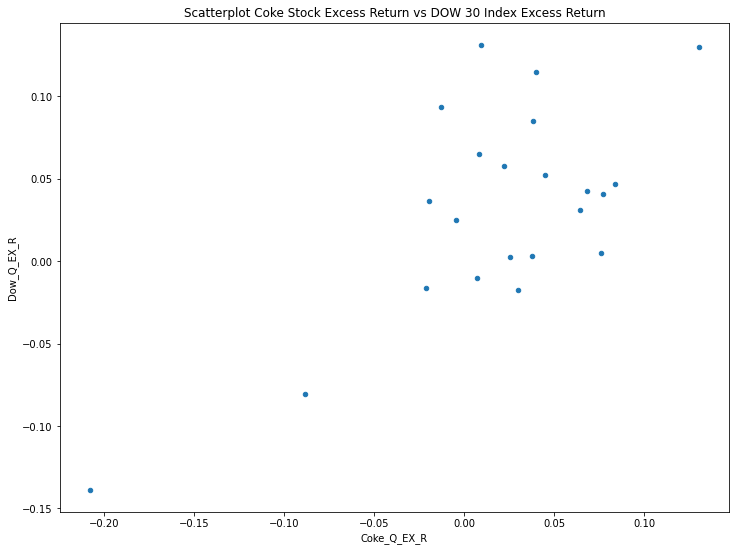

In [12]:
df = pd.read_csv("/home/sscf/wqu_mscfe/Financial Econometrics/M1/fin_data_set.csv")
scat = df.plot.scatter("Coke_Q_EX_R", "Dow_Q_EX_R", title="Scatterplot Coke Stock Excess Return vs DOW 30 Index Excess Return")
plt.show()

In [13]:
# Create a linear regression function with Ordinary least squares method.
result = smf.ols(
    "Coke_Q_EX_R ~ Dow_Q_EX_R + Pepsi_Q_EX_R + REV_Q_R", data=df
).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Coke_Q_EX_R   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     9.150
Date:                Sun, 12 Nov 2023   Prob (F-statistic):           0.000677
Time:                        13:06:23   Log-Likelihood:                 38.570
No. Observations:                  22   AIC:                            -69.14
Df Residuals:                      18   BIC:                            -64.78
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0080      0.011     -0.716      0.483      -0.032       0.015
Dow_Q_EX_R       0.6197      0.195      3.173      0.005       0.209       1.030
Pepsi_Q_EX_R     0.2187      0.179      1.221      0.238      -0.158       0.595
REV_Q_R          0.1435      0.088      1.632      0.120      -0.041       0.328
==============================================================================
Omnibus:                        1.644   Durbin-Watson:                   2.307
Prob(Omnibus):                  0.439   Jarque-Bera (JB):                1.411
Skew:                          -0.564   Prob(JB):                        0.494
Kurtosis:                       2.481   Cond. No.                         24.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
# Linear regression results:
result.summary2().tables[1]
# Coef. column is (beta0, beta1, ...): the coefficients of the exogenous (predictor) variables.

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Intercept,-0.008017,0.011189,-0.716476,0.482890,-0.031524,0.015490
Dow_Q_EX_R,0.619723,0.195287,3.173393,0.005261,0.209440,1.030006
Pepsi_Q_EX_R,0.218664,0.179107,1.220854,0.237893,-0.157627,0.594955
REV_Q_R,0.143481,0.087912,1.632093,0.120031,-0.041216,0.328178


Intercept: $\beta_0$

<Axes: >

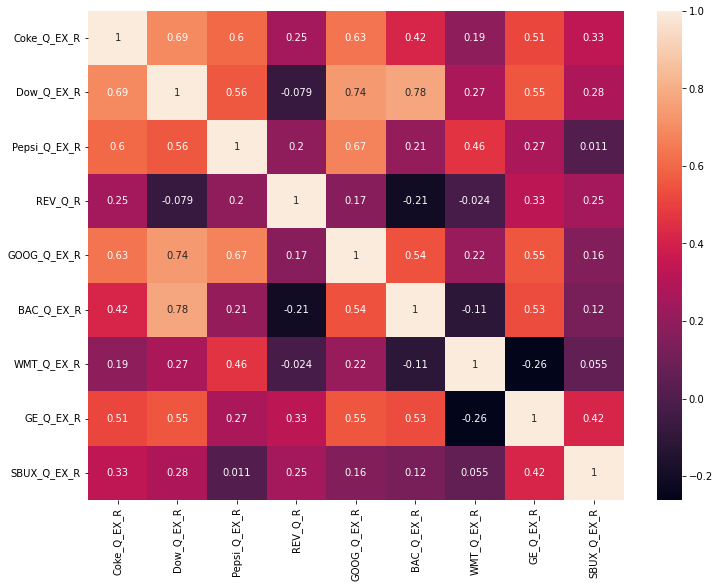

In [15]:
# Correlation plot of all the variables
data = df[
    [
        "Coke_Q_EX_R",
        "Dow_Q_EX_R",
        "Pepsi_Q_EX_R",
        "REV_Q_R",
        "GOOG_Q_EX_R",
        "BAC_Q_EX_R",
        "WMT_Q_EX_R",
        "GE_Q_EX_R",
        "SBUX_Q_EX_R",
    ]
]
c = data.corr()
sns.heatmap(c, annot=True)

In [16]:
# KO Excess Return Regression Model with Eight Independent Variables
# But most of the exogenous (predictor) variables are highly correlated. This is a "multicolinearity" problem.
# For example Dow_Q_EX_R and GOOG_Q_EX_R are highly correlated and therefore 
model_1 = smf.ols(
    "Coke_Q_EX_R ~ Dow_Q_EX_R + Pepsi_Q_EX_R + REV_Q_R + GOOG_Q_EX_R + BAC_Q_EX_R + WMT_Q_EX_R + GE_Q_EX_R + SBUX_Q_EX_R",
    data=df,
).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Coke_Q_EX_R   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     2.798
Date:                Sun, 12 Nov 2023   Prob (F-statistic):             0.0482
Time:                        13:06:24   Log-Likelihood:                 39.396
No. Observations:                  22   AIC:                            -60.79
Df Residuals:                      13   BIC:                            -50.97
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0059      0.017     -0.337      0.742      -0.043       0.032
Dow_Q_EX_R       0.7091      0.471      1.504      0.156      -0.309       1.727
Pepsi_Q_EX_R     0.2686      0.267      1.005      0.333      -0.309       0.846
REV_Q_R          0.1007      0.121      0.834      0.419      -0.160       0.362
GOOG_Q_EX_R      0.0233      0.208      0.112      0.912      -0.425       0.472
BAC_Q_EX_R      -0.0762      0.156     -0.487      0.634      -0.414       0.262
WMT_Q_EX_R      -0.1313      0.213     -0.617      0.548      -0.591       0.328
GE_Q_EX_R       -0.0040      0.106     -0.037      0.971      -0.234       0.226
SBUX_Q_EX_R      0.0824      0.135      0.608      0.554      -0.210       0.375
==============================================================================
Omnibus:                        1.980   Durbin-Watson:                   2.255
Prob(Omnibus):                  0.372   Jarque-Bera (JB):                1.638
Skew:                          -0.628   Prob(JB):                        0.441
Kurtosis:                       2.543   Cond. No.                         45.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
model_1.summary2().tables[1]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Intercept,-0.005859,0.017409,-0.336544,0.741832,-0.043469,0.031751
Dow_Q_EX_R,0.709085,0.471371,1.504303,0.156406,-0.309250,1.727419
Pepsi_Q_EX_R,0.268625,0.267324,1.004868,0.333299,-0.308893,0.846144
REV_Q_R,0.100740,0.120734,0.834399,0.419126,-0.160090,0.361570
GOOG_Q_EX_R,0.023328,0.207589,0.112377,0.912241,-0.425141,0.471798
BAC_Q_EX_R,-0.076156,0.156360,-0.487054,0.634329,-0.413950,0.261639
WMT_Q_EX_R,-0.131313,0.212743,-0.617238,0.547737,-0.590916,0.328290
GE_Q_EX_R,-0.003975,0.106396,-0.037365,0.970762,-0.233830,0.225879
SBUX_Q_EX_R,0.082359,0.135423,0.608162,0.553557,-0.210205,0.374923


In the above results, we can see no independent variable estimates are significant (*p-values* are all larger than 0.05). Even the *Dow 30* Index excess return is not significant in this model. This variable was significant in the model in Lesson 1. The $R^2$ is higher in this model (0.633) compared to the $R^2$ in Lesson 1's model (0.604). This is expected since we have added more independent variables to this model. However, the adjusted $R^2$ in this model (0.407) is significantly lower than the adjusted $R^2$ in the last model (0.538).

The existence of multicollinearity will make coefficient estimates less precise and not statistically significant.

This is because there are many correlated variables (multicolinearity) in this model, this makes each variable less significant (and thus higher $p$ value) compared to the model from Lesson 1, where we just used 3 exogenous (predictor, independent) variables. Also, the $R^2$ value is higher in this model but the adjusted $R^2$ and normal $R^2$ have a big gap, meaning we have many correlated variables and we may instead use fewer number of those variables because of multicolinearity.

Solutions to solve **multicolinearity** problem:

* We can drop exogenous variables with high correlation (think $\rho$ value of more than 0.8). In a correlated pair, we can drop one of the variables.
* We can treat one of the **independent** (predictor) variables in the model as a dependent variable and run a regression with the rest of the independent variables. We can use this method to determine if any of the independent variables can be explained by other independent variables.
* The third method is **principal component analysis** which is going to be discussed in L3.

In [18]:
# Using method 2:
# Regression model to check multicollinearity among independent variables
model_dow = smf.ols(
    "Dow_Q_EX_R ~ Pepsi_Q_EX_R + REV_Q_R + GOOG_Q_EX_R + BAC_Q_EX_R + WMT_Q_EX_R + GE_Q_EX_R + SBUX_Q_EX_R",
    data=df,
).fit()
model_dow.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Dow_Q_EX_R   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     11.91
Date:                Sun, 12 Nov 2023   Prob (F-statistic):           6.13e-05
Time:                        13:06:24   Log-Likelihood:                 51.064
No. Observations:                  22   AIC:                            -86.13
Df Residuals:                      14   BIC:                            -77.40
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0061      0.010     -0.625      0.542      -0.027       0.015
Pepsi_Q_EX_R     0.1892      0.143      1.324      0.207      -0.117       0.496
REV_Q_R         -0.0605      0.067     -0.910      0.378      -0.203       0.082
GOOG_Q_EX_R      0.0977      0.115      0.851      0.409      -0.148       0.344
BAC_Q_EX_R       0.2319      0.063      3.658      0.003       0.096       0.368
WMT_Q_EX_R       0.1898      0.109      1.734      0.105      -0.045       0.425
GE_Q_EX_R        0.0570      0.058      0.977      0.345      -0.068       0.182
SBUX_Q_EX_R      0.0800      0.074      1.084      0.297      -0.078       0.238
==============================================================================
Omnibus:                        0.530   Durbin-Watson:                   2.372
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.588
Skew:                          -0.043   Prob(JB):                        0.745
Kurtosis:                       2.204   Cond. No.                         26.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
model_1.summary2().tables[1]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Intercept,-0.005859,0.017409,-0.336544,0.741832,-0.043469,0.031751
Dow_Q_EX_R,0.709085,0.471371,1.504303,0.156406,-0.309250,1.727419
Pepsi_Q_EX_R,0.268625,0.267324,1.004868,0.333299,-0.308893,0.846144
REV_Q_R,0.100740,0.120734,0.834399,0.419126,-0.160090,0.361570
GOOG_Q_EX_R,0.023328,0.207589,0.112377,0.912241,-0.425141,0.471798
BAC_Q_EX_R,-0.076156,0.156360,-0.487054,0.634329,-0.413950,0.261639
WMT_Q_EX_R,-0.131313,0.212743,-0.617238,0.547737,-0.590916,0.328290
GE_Q_EX_R,-0.003975,0.106396,-0.037365,0.970762,-0.233830,0.225879
SBUX_Q_EX_R,0.082359,0.135423,0.608162,0.553557,-0.210205,0.374923


As we can see, the predictor variable **Dow_Q_EX_R** can actually be expressed as a linear function of the other independent (predictor) variables, with $R^2 = 0.856$

It means that the information of Dow 30 Index excess return can be mostly explained by the rest of the independent variables. In statistics, the **variance inflation factor (VIF)** is used to determine if an independent variable has a **multicollinearity** issue. The **VIF** formula for each independent variable is as follows: 

$$ \text{VIF} = \frac{1}{ 1- R^2 } $$

Any software will calculate the VIF for each independent variable. The value of the VIF is from 1 and upward without limit.

- When $R^2$ is 0, the VIF is 1. It means there is no multicollinearity for this independent variable.
- The higher the VIF, the more multicollinearity is present for this independent variable.
- An independent variable with a VIF between 1 and 5 has **no severe multicollinearity.**
- An independent variable with a VIF that is higher than 5 indicates **severe multicollinearity.**

For an independent variable that has a high VIF, we can test the model with and without this variable and then check the model result.

In [20]:
labels = [
    "Intercept",
    "Dow_Q_EX_R",
    "Pepsi_Q_EX_R",
    "REV_Q_R",
    "GOOG_Q_EX_R",
    "BAC_Q_EX_R",
    "WMT_Q_EX_R",
    "GE_Q_EX_R",
    "SBUX_Q_EX_R",
]

variables = model_1.model.exog
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]

pd.DataFrame(vif[1:], labels[1:], columns=["VIF"])

,VIF
Dow_Q_EX_R,6.957440
Pepsi_Q_EX_R,2.748897
REV_Q_R,1.612413
GOOG_Q_EX_R,3.241519
BAC_Q_EX_R,4.269485
WMT_Q_EX_R,2.184550
GE_Q_EX_R,3.096814
SBUX_Q_EX_R,1.511017


We can see *Dow 30* Index has a VIF value larger than $5$. Since this variable has a severe multicollinearity issue, we need to dig further into this variable and maybe drop it from the model.